# Librerías necesarias
pyplot nos ayudará con las pruebas recogidas en matrices a exponerlas en gráficos. En cambio, SequencialDecisionTreeAlgorithm es el archivo que contiene la clase SequencialDecisionTreeAlgorithm como propuesta de algoritmo secuencial del alumno.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Para modelo de aprendizaje por árboles de decisión
from lib.SequencialDecisionTreeAlgorithm import SequencialDecisionTreeAlgorithm
# Generalizado para más modelos: árboles de decisión o knn
from lib.SequencialModelAlgorithm import SequencialModelAlgorithm

# Selección de columnas
dataset = pd.read_csv('./datasets/adultDataset.csv', header = 0)
attr_cols = dataset.loc[:, 'capital-gain':'native-country']
obj_col = dataset['income']

## 1. Pruebas en el Dataset adultsDataset
La primera prueba la realizamos con parámetros predeterminados que usaremos también en las demás pruebas. Esto nos ayudará a fijar unas proporciones y poder comparar los resultados del algoritmo entre diferentes datasets

In [2]:
print('---- adultDataset.csv ----')
print('Hiperparámetros predeterminados: \n- ntree = 300\n- sample_size = 0.65\n- max_depth = 10\n- lr = 0.1')
SeqTree = SequencialDecisionTreeAlgorithm()
trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
print('Score: '+str(score))

---- adultDataset.csv ----
Hiperparámetros predeterminados: 
- ntree = 300
- sample_size = 0.65
- max_depth = 10
- lr = 0.1
Score: 0.9037457376777728


### 1.1 Alteración del hiperparámetro ntree
Con esto aumentaremos o disminuiremos la cantidad de árboles secuenciales en diferentes pruebas. Probaremos fijando los parámetros predeterminados y moviendo solo el parámetro ntrees entre 1 y 500.


--- Alterando sample_size [1 - 500] ---


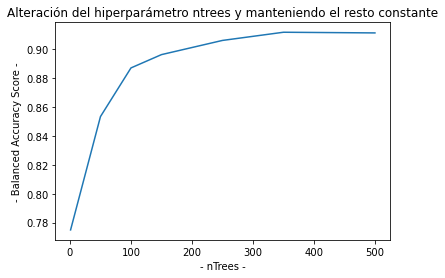

Mejor puntuación: 0.9118628588468929 con valor = 350
--------------------------




In [3]:
values = [1, 50, 100, 150, 250, 350, 500]
print('\n--- Alterando sample_size ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')
scores = []

for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = values[v], sample_size = 0.65, max_depth = 10, lr = 0.1)
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- nTrees -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro ntrees y manteniendo el resto constante')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

print('--------------------------')
print('\n')

Observamos que a medida que nos acercamos a los 350 árboles obtenemos el máximo valor de puntuación. Es una función logarítmica por lo que no esperamos encontrar mejores valores por más que aumentemos los árboles. Podemos concretar que lo más óptimo sería fijar el algoritmo en 350 árboles al menos para este ejemplo, ya que nos devolvería un resultado similar pero en menor ejecución

### 1.2 Alteración del hiperparámetro sample_size


--- Alterando sample_size [0.1 - 0.9] ---


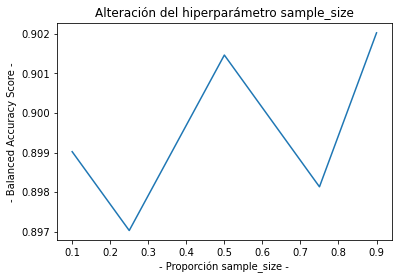

Mejor puntuación: 0.9020215788410728 con valor = 0.9


In [3]:
values = [0.1, 0.25, 0.5, 0.75, 0.9]
print('\n--- Alterando sample_size ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = values[v], max_depth = 10, lr = 0.1)
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- Proporción sample_size -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro sample_size')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

Debido a la aletoriedad de la muestra, este parámetro no muestra un cambio directo. Comprobamos también realizando el proceso 5 veces y realizando la media de los resultados obtenidos para cada valor (puede tardar bastante):


--- Alterando 5 veces sample_size [0.1 - 0.9] ---
[0.89862987 0.89665521 0.9020798  0.89282503 0.89349684]


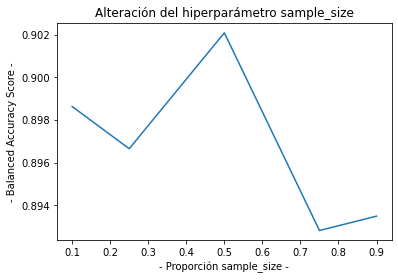

Mejor puntuación: 0.9020797991597934 con valor = 0.5


In [8]:
values = [0.1, 0.25, 0.5, 0.75, 0.9]
print('\n--- Alterando 5 veces sample_size ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

tests = []
for j in range(5):
    for v in range(len(values)):
        SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = values[v], max_depth = 10, lr = 0.1)
        trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
        if len(tests)<= v:
            tests.append([])
        tests[v].append(score)

print(np.mean(tests, axis=0))
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, np.mean(tests, axis=0))
plt.xlabel('- Proporción sample_size -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro sample_size')
plt.show()

m = np.argmax(np.mean(tests, axis=0))
print('Mejor puntuación: '+str(np.mean(tests, axis=0)[m])+' con valor = '+str(values[m]))

Podemos decir que cuanta mayor proporción de ejemplos del conjunto de evaluación mayor puntuación obtiene el algoritmo. 

## 1.3 Alteración del hiperparámetro max_depth


--- Alterando max_depth [1 - 20] ---


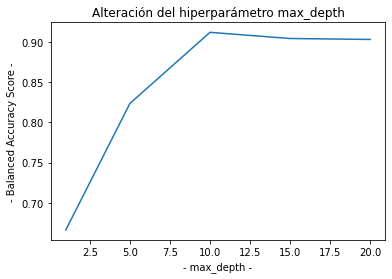

Mejor puntuación: 0.9119241483786409 con valor = 10


In [17]:
values = [1, 5, 10, 15, 20]
print('\n--- Alterando max_depth ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = 0.65, max_depth = values[v], lr = 0.1)
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- max_depth -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro max_depth')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

### 1.4 Alteración del hiperparámetro de aprendizaje lr

In [1]:
values = [0.1, 0.25, 0.5, 0.75, 0.9]
print('\n--- Alterando lr ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = 0.65, max_depth = 10, lr = values[v])
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- lr -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro de aprendizaje lr')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

NameError: name 'np' is not defined


--- Alterando 5 veces lr [0.1 - 0.9] ---
[0.90008779 0.90307536 0.89916069 0.90222473 0.89594557]


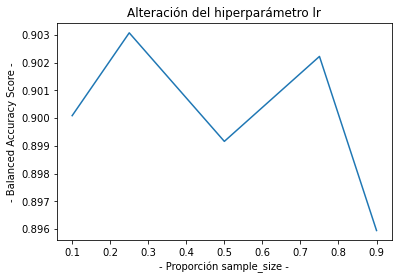

Mejor puntuación: 0.90307536092619 con valor = 0.25


In [9]:
values = [0.1, 0.25, 0.5, 0.75, 0.9]
print('\n--- Alterando 5 veces lr ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

tests = []
for j in range(5):
    for v in range(len(values)):
        SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = values[v], max_depth = 10, lr = 0.1)
        trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
        if len(tests)<= v:
            tests.append([])
        tests[v].append(score)

print(np.mean(tests, axis=0))
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, np.mean(tests, axis=0))
plt.xlabel('- Proporción sample_size -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro lr')
plt.show()

m = np.argmax(np.mean(tests, axis=0))
print('Mejor puntuación: '+str(np.mean(tests, axis=0)[m])+' con valor = '+str(values[m]))

## Exploración y evaluación de otros hiperparámetros
Evaluaremos hiperparámetros opcionales como min_weight_fraction_leaf, min_samples_leaf y max_features


--- Alterando min_weight_fraction_leaf [0.1 - 0.4] ---


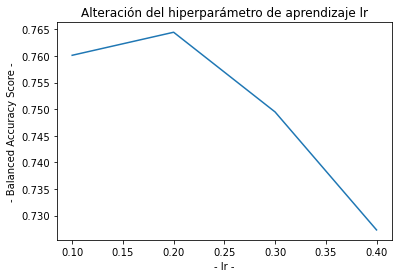

Mejor puntuación: 0.7644799597440504 con valor = 0.2


In [6]:
values = [0.1, 0.2, 0.3, 0.4]
print('\n--- Alterando min_weight_fraction_leaf ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = 0.65, max_depth = 10, lr = 0.1, min_weight_fraction_leaf=values[v])
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- lr -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro de aprendizaje min_weight_fraction_leaf')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))


--- Alterando max_features ---


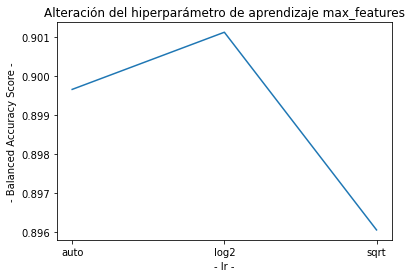

Mejor puntuación: 0.9011208974378893 con valor = log2


In [12]:
values = ["auto", "log2", "sqrt"]
print('\n--- Alterando max_features ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = 0.65, max_depth = 10, lr = 0.1, max_features=values[v])
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- lr -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro de aprendizaje max_features')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))


--- Alterando min_samples_leaf [1 - 20] ---


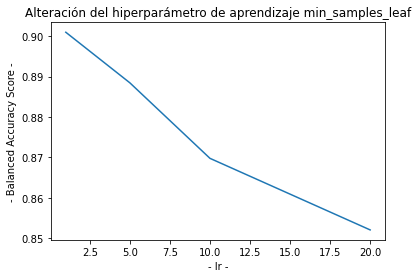

Mejor puntuación: 0.9009756308274788 con valor = 1


In [13]:
values = [1, 5, 10, 20]
print('\n--- Alterando min_samples_leaf ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')

scores = []
for v in range(len(values)):
    SeqTree = SequencialDecisionTreeAlgorithm(ntree = 300, sample_size = 0.65, max_depth = 10, lr = 0.1, min_samples_leaf=values[v])
    trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- lr -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro de aprendizaje min_samples_leaf')
plt.show()

m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

## 2. Ejemplo con mejor configuración
Ajustamos con:
- ntree = 350
- sample_size = 0.25
- max_depth = 10
- lr = 0.25

La alteración de ntree supone una función logarítmica, y después de muchas pruebas para aborrecer la aletoriedad, supone que en 250 ya puede dar el resultado más óptimo con la menor cantidad de árboles que suponen más ejecución.

sample_size no nos ha ofrecido mejores valores

In [7]:
SeqTree = SequencialDecisionTreeAlgorithm(ntree = 350, sample_size = 0.25, max_depth = 10, lr = 0.25)
trees, score = SeqTree.start(attributes_cols = attr_cols, objetive_col = obj_col)

print('Score final: '+str(score))

Score final: 0.9105984662270998


## 3. Ejemplo con knn
### Alterando nmodels


--- Alterando nmodels [1 - 25] ---


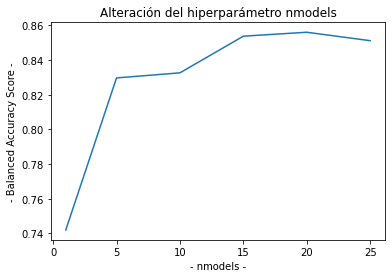

Mejor puntuación: 0.8560309846527981 con valor = 20


In [9]:
values = [1, 5, 10, 15, 20, 25]
print('\n--- Alterando nmodels ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')
scores = []

for v in range(len(values)):
    SeqModel = SequencialModelAlgorithm(nmodels = values[v], method = "knn")
    models, score = SeqModel.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- nmodels -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro nmodels')
plt.show()
m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))

### Alterando n_neighbors


--- Alterando n_neighbors [1 - 5] ---


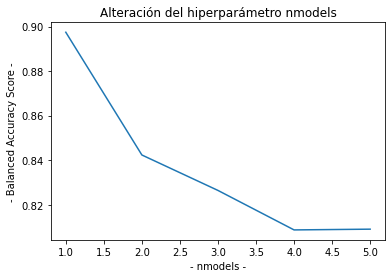

Mejor puntuación: 0.8974235851212131 con valor = 1


In [3]:
values = [1, 2, 3, 4, 5]
print('\n--- Alterando n_neighbors ['+str(np.min(values))+' - '+str(np.max(values))+'] ---')
scores = []

for v in range(len(values)):
    SeqModel = SequencialModelAlgorithm(neighbors = values[v], nmodels=10,  method = "knn")
    models, score = SeqModel.start(attributes_cols = attr_cols, objetive_col = obj_col)
    scores.append(score)
    
# Realizamos una gráfica para determinar cómo afecta ntree a la puntuación
plt.plot(values, scores)
plt.xlabel('- nmodels -')
plt.ylabel('- Balanced Accuracy Score -')
plt.title('Alteración del hiperparámetro nmodels')
plt.show()
m = np.argmax(scores)
print('Mejor puntuación: '+str(scores[m])+' con valor = '+str(values[m]))